<a href="https://colab.research.google.com/github/9M3a1h3d9i9/Naive-Bayes-and-ROC-/blob/main/Naive_Bayes_Classification_PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the name of GOD

# Mohammad Mahdi Shafighy

# 1403.09

# Shahed University

In [134]:
import pandas as pd
import numpy as np

# df = pd.read_csv("/content/sick.csv")
df = pd.read_csv("/content/synthetic_patient_data.csv")


# df.head(10)
df.tail(10)

,Patient,Fever,Cough,Fatigue,Body Pain,Class
999990,P999990,1,1,0,0,Sick
999991,P999991,1,0,0,0,Sick
999992,P999992,1,1,1,1,Sick
999993,P999993,1,1,1,0,Sick
999994,P999994,1,0,1,1,Sick
999995,P999995,0,1,1,1,Sick
999996,P999996,1,0,1,1,Sick
999997,P999997,0,0,1,1,Sick
999998,P999998,1,1,1,1,Sick
999999,P999999,1,0,0,1,Sick


In [135]:
# df.describe()
df.shape

(1000000, 6)

# 1. Calculate Prior Probabilities (Results)

In [136]:
total_patients = len(df)
# print(len(df))
sick_count = len(df[df['Class'] == 'Sick'])
# print(sick_count)
healthy_count = len(df[df['Class'] == 'Healthy'])
# print(healthy_count)

P_sick = sick_count / total_patients
P_healthy = healthy_count / total_patients

P_sick, P_healthy


(0.04, 0.96)

# 2. we will calculate the likelihoods for each feature (Fever, Cough, Fatigue, Body Pain) for both classes (Sick and Healthy)

In [137]:
features = ['Fever', 'Cough', 'Fatigue', 'Body Pain']

likelihood_sick = {}
likelihood_healthy = {}

for feature in features:
    #Sick
    feature_given_sick = df[df['Class'] == 'Sick'][feature].sum()
    # print(feature_given_sick)
    likelihood_sick[feature] = (feature_given_sick + 1) / (sick_count + 2)
    # print(likelihood_sick)

    #Healthy
    feature_given_healthy = df[df['Class'] == 'Healthy'][feature].sum()
    # print(feature_given_healthy)
    likelihood_healthy[feature] = (feature_given_healthy + 1) / (healthy_count + 2)
    # print(likelihood_healthy)
likelihood_sick, likelihood_healthy


({'Fever': 0.7997850107494625,
  'Cough': 0.6962901854907254,
  'Fatigue': 0.599870006499675,
  'Body Pain': 0.8974301284935753},
 {'Fever': 0.10013312472265683,
  'Cough': 0.2007099985208364,
  'Fatigue': 0.2996129174730886,
  'Body Pain': 0.05012802056662382})

# 3. Calculate posterior probabilities
# likelihood Func (consider : features present in the patient)

In [138]:
def posterior_probability(features, prior_sick, prior_healthy, likelihood_sick, likelihood_healthy):
  P_sick_given_features = prior_sick
  P_healthy_given_features = prior_healthy

  for feature, value in features.items():
    if value == 1:
      P_sick_given_features *= likelihood_sick[feature]
      P_healthy_given_features *= likelihood_healthy[feature]

  # Calculate P(Features) using the law of total probability
  P_features = (P_sick_given_features + P_healthy_given_features)

  P_sick_given_features /= P_features
  P_healthy_given_features /= P_features

  return P_sick_given_features, P_healthy_given_features

# Now let's calculate the probability of illness if she has a fever?
# P(Sick | fever) = ?

In [142]:
new_patient = {'Fever': 1, 'Cough': 0, 'Fatigue': 0, 'Body Pain': 1}

# Only consider features present in the patient

In [143]:
posterior_sick, posterior_healthy = posterior_probability(
    new_patient,
    P_sick,
    P_healthy,
    likelihood_sick,
    likelihood_healthy
)

print(f"Posterior Probability of Sick: {posterior_sick:.4f}")
print(f"Posterior Probability of Healthy: {posterior_healthy:.4f}")

Posterior Probability of Sick: 0.8563
Posterior Probability of Healthy: 0.1437


# Classification


In [144]:
classification = "Sick" if posterior_sick > posterior_healthy else "Healthy"
print(f"Classification: {classification}")

Classification: Sick


# ROC curve


## Assuming you have true labels (y_true) and predicted probabilities (y_scores)
## Replace these with your actual data

In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [147]:
y_true = df['Class'].map({'Sick': 1, 'Healthy': 0}).values  # Convert class labels to numerical (0 or 1)
y_scores = []
for index, row in df.iterrows():
    new_patient = {'Fever': row['Fever'], 'Cough': row['Cough'], 'Fatigue': row['Fatigue'], 'Body Pain': row['Body Pain']}
    posterior_sick, _ = posterior_probability(
        new_patient,
        P_sick,
        P_healthy,
        likelihood_sick,
        likelihood_healthy
    )
    y_scores.append(posterior_sick)

# Compute ROC curve and ROC area


In [148]:
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve


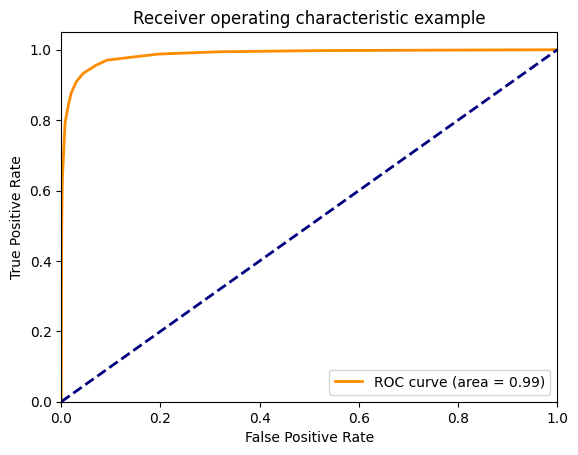

In [149]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# prompt: Precition / recall cuve


In [154]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

## Calculate precision and recall


In [155]:
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)


# Calculate average precision score


In [156]:
average_precision = average_precision_score(y_true, y_scores)


# Plot the precision-recall curve


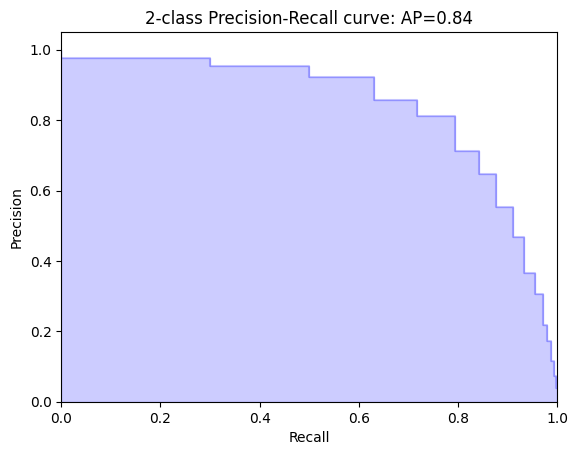

In [157]:
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()